### PyTorch is a Python-based scientific computing package serving two broad purposes:
1. A replacement for NumPy to use the power of GPUs and other accelerators.
2. An automatic differentiation library that is useful to implement neural networks.

1. https://pytorch.org/get-started/locally/
2. https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
3. https://github.com/yunjey/pytorch-tutorial

In [1]:
#Import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001


In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)



In [4]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [5]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [5/60], Loss: 13.1011
Epoch [10/60], Loss: 5.6002
Epoch [15/60], Loss: 2.5610
Epoch [20/60], Loss: 1.3293
Epoch [25/60], Loss: 0.8298
Epoch [30/60], Loss: 0.6270
Epoch [35/60], Loss: 0.5443
Epoch [40/60], Loss: 0.5104
Epoch [45/60], Loss: 0.4961
Epoch [50/60], Loss: 0.4898
Epoch [55/60], Loss: 0.4868
Epoch [60/60], Loss: 0.4851


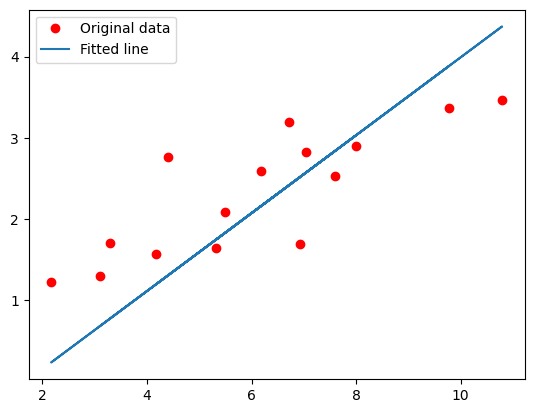

In [6]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


In [7]:
# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')